In [1]:
from keras import applications, optimizers
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.convolutional import Convolution2D
from keras import backend as K
import keras
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from img_loader import DatasetLoader
from keras.utils import np_utils
from keras.preprocessing import image
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
from sklearn.preprocessing import MinMaxScaler
import scipy.misc
from PIL import ImageEnhance
import cv2
import matplotlib.pyplot as pp
from keras.models import load_model, save_model
import random
from numpy import argmax
import tensorflow as tf

Using TensorFlow backend.


In [2]:
%matplotlib inline
np.random.seed(123)  # for reproducibility
random.seed(123)

In [3]:
dl = DatasetLoader("/home/lux/dev/Bachelor-2017/keras/dataset", 400)
model = load_model("/home/lux/dev/bachelor/BACHELOR-2017-SAFE/vgg16_ft_cam_normal.h5")
model.summary()

DATASET LOADER] Discovering dataset...
DATASET LOADER] 
38 classes found.
 54305 images found.
DATASET LOADER] Shuffling order...
DATASET LOADER] 
Ready for loading!
 40728 for training and 13576 for testing
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________


/usr/lib64/python3.5/site-packages/keras/models.py:281: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [4]:
# Ok here the optimizer is not loaded but it's not important as we only want to do predictions. No more training.

In [5]:
i = 7

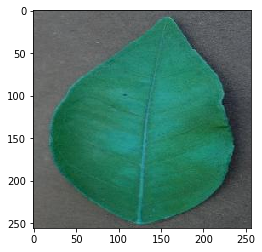

predict input's shape: (1, 256, 256, 3)


In [6]:
predict_input = cv2.imread(dl.baseDirectory + "/" + dl.imgDataArray[i].directory + "/" +
                                       dl.imgDataArray[i].name, cv2.IMREAD_COLOR)
plt.imshow(predict_input)
plt.show()
predict_input = predict_input.astype('float32')
predict_input = np.expand_dims(predict_input, axis=0)
print("predict input's shape:", predict_input.shape)
predict_input = preprocess_input(predict_input)

In [7]:
for d in dl.directories:
    print(d)

('Apple___Apple_scab', 0)
('Apple___Black_rot', 1)
('Apple___Cedar_apple_rust', 2)
('Apple___healthy', 3)
('Blueberry___healthy', 4)
('Cherry_(including_sour)___Powdery_mildew', 5)
('Cherry_(including_sour)___healthy', 6)
('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 7)
('Corn_(maize)___Common_rust_', 8)
('Corn_(maize)___Northern_Leaf_Blight', 9)
('Corn_(maize)___healthy', 10)
('Grape___Black_rot', 11)
('Grape___Esca_(Black_Measles)', 12)
('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 13)
('Grape___healthy', 14)
('Orange___Haunglongbing_(Citrus_greening)', 15)
('Peach___Bacterial_spot', 16)
('Peach___healthy', 17)
('Pepper,_bell___Bacterial_spot', 18)
('Pepper,_bell___healthy', 19)
('Potato___Early_blight', 20)
('Potato___Late_blight', 21)
('Potato___healthy', 22)
('Raspberry___healthy', 23)
('Soybean___healthy', 24)
('Squash___Powdery_mildew', 25)
('Strawberry___Leaf_scorch', 26)
('Strawberry___healthy', 27)
('Tomato___Bacterial_spot', 28)
('Tomato___Early_blight', 29)
('Toma

In [8]:
mapping = [('Tomato___Tomato_mosaic_virus', 0),
           ('Tomato___Early_blight', 1),
           ('Tomato___Target_Spot', 2), 
           ('Tomato___Late_blight', 3),
           ('Soybean___healthy', 4),
           ('Grape___Black_rot', 5),
           ('Potato___healthy', 6),
           ('Blueberry___healthy', 7),
           ('Potato___Early_blight', 8),
           ('Orange___Haunglongbing_(Citrus_greening)', 9),
           ('Apple___Apple_scab', 10),
           ('Squash___Powdery_mildew', 11),
           ('Grape___healthy', 12),
           ('Apple___Cedar_apple_rust', 13), 
           ('Strawberry___Leaf_scorch', 14),
           ('Pepper,_bell___healthy', 15),
           ('Peach___healthy', 16),
           ('Raspberry___healthy', 17),
           ('Cherry_(including_sour)___healthy', 18), 
           ('Grape___Esca_(Black_Measles)', 19),
           ('Potato___Late_blight', 20),
           ('Apple___healthy', 21), 
           ('Cherry_(including_sour)___Powdery_mildew', 22),
           ('Corn_(maize)___Common_rust_', 23), 
           ('Tomato___Septoria_leaf_spot', 24),
           ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 25),
           ('Tomato___Bacterial_spot', 26),
           ('Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 27),
           ('Tomato___Spider_mites Two-spotted_spider_mite', 28),
           ('Corn_(maize)___healthy', 29), 
           ('Tomato___healthy', 30),
           ('Apple___Black_rot', 31), 
           ('Tomato___Leaf_Mold', 32),
           ('Strawberry___healthy', 33),
           ('Pepper,_bell___Bacterial_spot', 34),
           ('Tomato___Tomato_Yellow_Leaf_Curl_Virus', 35),
           ('Corn_(maize)___Northern_Leaf_Blight', 36), 
           ('Peach___Bacterial_spot', 37)]

In [9]:
predict_input.shape

(1, 256, 256, 3)

In [10]:
predictions = model.predict(predict_input)
model.predict_classes(predict_input)

1/1 [==============================] - 1s


array([15])

In [11]:
predictions[0]

array([  7.35466714e-14,   1.52311399e-12,   2.80819747e-12,
         1.20504218e-10,   3.12304176e-11,   2.42245973e-10,
         1.03312159e-08,   9.10775795e-13,   5.97391060e-14,
         1.46905994e-11,   1.76020931e-09,   5.25109097e-15,
         3.84617925e-15,   6.24861491e-14,   5.96083241e-14,
         1.00000000e+00,   1.32619124e-10,   3.95214157e-12,
         8.08111356e-10,   5.01631618e-11,   1.58857919e-17,
         7.78718062e-11,   7.71554608e-12,   5.71992743e-14,
         6.05053507e-10,   1.24077050e-15,   2.10954204e-16,
         7.30624242e-12,   1.59771976e-13,   1.24715776e-15,
         3.05101083e-11,   2.80450385e-16,   7.50123047e-17,
         1.64509479e-13,   5.80484649e-16,   2.57438137e-09,
         8.84001613e-19,   1.49818317e-11], dtype=float32)

(38,)


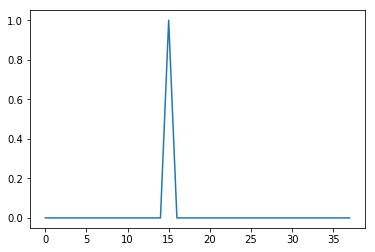

In [12]:
print(predictions[0].shape)
pp.plot(predictions[0])
pp.show()

In [13]:
# predicted class value
value = np.amax(predictions[0])
value

1.0

In [14]:
# predicted class is 
print("predicted shample name = ", dl.imgDataArray[i].name)
print("predicted shample's class = ", dl.imgDataArray[i].img_class)
print("predicted shample's directory = ", dl.imgDataArray[i].directory)
np.where(predictions[0]==value)

predicted shample name =  78775e0f-0e3f-4bcc-b2f0-994fd7be87c4___UF.Citrus_HLB_Lab 1542.JPG
predicted shample's class =  15
predicted shample's directory =  Orange___Haunglongbing_(Citrus_greening)


(array([15]),)

In [15]:
print(argmax(predictions))

15


In [16]:
"""for i in range(dl.number_of_imgs_for_test, dl.number_of_imgs_for_test+600):
    for m in mapping:
        if m[0] == dl.imgDataArray[i].get_directory():
            dl.imgDataArray[i].img_class = m[1]"""

'for i in range(dl.number_of_imgs_for_test, dl.number_of_imgs_for_test+600):\n    for m in mapping:\n        if m[0] == dl.imgDataArray[i].get_directory():\n            dl.imgDataArray[i].img_class = m[1]'

In [17]:
s = 0
ts = 0
for i in range(dl.number_of_imgs_for_test, dl.number_of_imgs_for_test+20):
    predict_input = cv2.imread(dl.baseDirectory + "/" + dl.imgDataArray[i].directory + "/" +
                                       dl.imgDataArray[i].name, cv2.IMREAD_COLOR)
    predict_input = np.expand_dims(predict_input, axis=0)
    predict_input = predict_input.astype('float32')
    predict_input = preprocess_input(predict_input)
    predictions = model.predict(predict_input)
    value = argmax(predictions)
    if(value == dl.imgDataArray[i].img_class):
        s += 1
    else:
        print("Value mismatch-> expected", dl.imgDataArray[i].img_class, "but got", value)
    ts += 1
print("s", s, "TS", ts)

s 20 TS 20


In [8]:
w = model.get_layer("W").get_weights()[0]

In [9]:
w[0].shape

(38,)

In [10]:
def get_outputs_generator(model, layer_name):
    """
    Gets the output generator of a specific layer of the model.

    :param model: The model
    :param layer_name: The layer's name
    :return: the output generator (a function)
    """
    layer_model = Model(
        input=model.input,
        output=model.get_layer(layer_name).output
    )

    return layer_model.predict


In [11]:
 output_generator = get_outputs_generator(model, 'CAM')
layer_outputs = output_generator(np.expand_dims(predict_input[0], axis=0))[0]


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("CA..., inputs=Tensor("in...)`


In [14]:
w.shape

(512, 38)

In [15]:
im_width = 256

In [16]:
#conv_resized = tf.image.resize_bilinear(layer_outputs, [im_width, im_width])

In [17]:
layer_outputs_alt = layer_outputs.reshape(1, 8, 8, 512)

In [18]:
conv_resized = tf.image.resize_bilinear(layer_outputs_alt, [im_width, im_width])

In [19]:
conv_resized.shape

TensorShape([Dimension(1), Dimension(256), Dimension(256), Dimension(512)])

In [20]:
maps = K.dot(conv_resized, tf.convert_to_tensor(w))

In [21]:
maps = tf.reshape(maps, (38, 256, 256))
maps.shape

TensorShape([Dimension(38), Dimension(256), Dimension(256)])

In [22]:
tf_session = K.get_session()

In [23]:
with tf_session:
    maps_arr = maps.eval()

In [24]:
maps_arr.shape

(38, 256, 256)

In [25]:
maps_arr[0].shape

(256, 256)

In [26]:
maps_arr_bu = maps_arr

In [27]:
maps_arr[0] = MinMaxScaler((0.0, 1.0)).fit_transform(maps_arr[0])

In [29]:
maps_arr[0].shape

(256, 256)

In [30]:
maps_arr[0]

array([[ 0.50114453,  0.20599611,  0.91005147, ...,  0.40821737,
         0.29230267,  0.16112547],
       [ 0.86728781,  0.44843543,  0.97628307, ...,  0.69896972,
         0.75770557,  0.49179381],
       [ 0.55512816,  0.13166468,  0.1150696 , ...,  0.6643818 ,
         0.38762736,  0.44751936],
       ..., 
       [ 0.25047818,  0.39855069,  0.86646175, ...,  0.54107368,
         1.        ,  0.19162536],
       [ 0.4431946 ,  0.20033024,  0.23544341, ...,  0.52348757,
         0.35310161,  0.75805938],
       [ 0.63274324,  0.71000165,  0.0277679 , ...,  0.56145495,
         0.6591599 ,  0.34015211]], dtype=float32)

In [31]:
from scipy.misc import toimage
img = toimage(maps_arr[0])

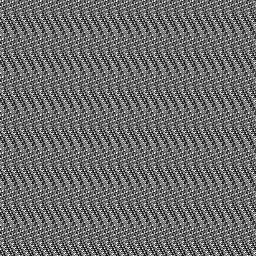

In [34]:
img